In [1]:
# Import Libraries & Dependencies

from sqlalchemy import create_engine
from config import password
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2

In [2]:
# 1. Create a connection
# password was added to the config.py (which was on the .ignore list to not b uploaded to the repo)

engine_string = 'postgresql://postgres:' + password + '@localhost:5432/Homework-9'
engine = create_engine(engine_string)
connection = engine.connect()

In [3]:
# 2.a. Create dataframe of employee salaries

df = pd.read_sql("SELECT * FROM salaries", connection)
df.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [4]:
sal = df['salary']
sal.head(10)

0    60117
1    65828
2    40006
3    40054
4    78228
5    40000
6    56724
7    46671
8    60929
9    72488
Name: salary, dtype: int64

Text(0, 0.5, 'Number of Employees')

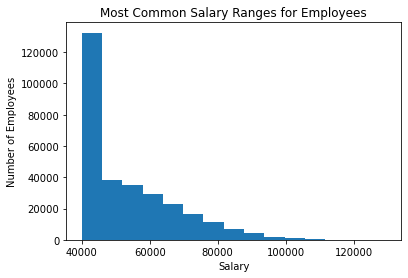

In [10]:
# 2.b. Create a histogram to visualize the most common salary ranges for employees.

plt.hist(sal,15);
plt.title('Most Common Salary Ranges for Employees')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')

In [11]:
# 3.a. 3. Create a df of average salary by title.

df2 = pd.read_sql("SELECT t.title, s.salary FROM employees e INNER JOIN titles t ON t.title_id = e.emp_title_id INNER JOIN salaries s ON s.emp_no = e.emp_no", connection)
df2.head()

,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000


In [12]:
# Create groupby for title salary

title_salary = df2.groupby("title")
title_salary.mean()

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


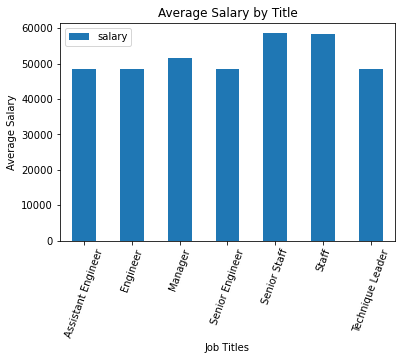

In [13]:
# 3.a. Create a bar chart of average salary by title

title_salary.mean().plot(kind="bar")
plt.title("Average Salary by Title")
plt.xlabel("Job Titles")
plt.ylabel("Average Salary")
plt.xticks(rotation=70)
plt.show()